In [33]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

In [34]:
wd = os.getcwd()
wd

'C:\\Users\\rovci\\Downloads\\Python\\diplomado\\Módulo 3_ Aplicaciones de las ciencias de datos espaciales en estudios urbanos\\clase_41'

In [35]:
#csv
df = pd.read_csv(f'{wd}/accidentes_santiago.csv', index_col='Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2325
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         2326 non-null   int64  
 1   Ano         802 non-null    float64
 2   Codregion   802 non-null    float64
 3   Region      802 non-null    object 
 4   Comuna      1692 non-null   object 
 5   Zona        2326 non-null   object 
 6   Calle1      802 non-null    object 
 7   Calle2      734 non-null    object 
 8   Numero      68 non-null     float64
 9   lat         802 non-null    float64
 10  lng         802 non-null    float64
 11  Claseaccid  1851 non-null   float64
 12  Cód_Comun   1436 non-null   float64
 13  Tipo__CONA  802 non-null    object 
 14  Cód_Zona    1851 non-null   float64
 15  Zona_1      802 non-null    object 
 16  Cód_Ubica   802 non-null    float64
 17  Ubicación   802 non-null    object 
 18  Cód_Calle   802 non-null    float64
 19  Intersecci  1217 non-null  

In [36]:
#shape
y = [2019, 2020, 2021, 2022]
gdfs = [gpd.read_file(f'{wd}/accidentes_{i}.shp') for i in y]
gdf_2019, gdf_2020, gdf_2021, gdf_2022 = gdfs

In [37]:
gdf_columns = [gdf.columns for gdf in gdfs]
gdf_columns_intersection = set.intersection(*map(set, gdf_columns))

In [38]:
m_columns = [col for col in gdf_2019.columns if col not in gdf_columns_intersection]
print(m_columns)

['Ano', 'Codregion', 'Region', 'Comuna', 'Calle1', 'Calle2', 'Numero', 'lat', 'lng', 'Claseaccid', 'Cód_Comun', 'Tipo__CONA', 'Cód_Zona', 'Zona_1', 'Cód_Ubica', 'Ubicación', 'Cód_Calle', 'Intersecci', 'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo', 'Tipo_Calza', 'Menos_Grav', 'Accidentes']


In [39]:
renames = {'Ano': 'Año',
             'Codregion': 'Cód_Regi',
             'Region': 'Región',
             'REGION': 'Región',
             'COMUNA': 'Comuna',
             'Menos_grav': 'Menos_Grav',
             'Siniestros': 'Accidentes'}

In [40]:
select = ['Año', 'Cód_Regi', 'Región', 'Comuna', 'Fallecidos', 'Graves', 'Menos_Grav', 'Leves', 'Accidentes', 'geometry']

In [41]:
gdfs = [gdf.rename(columns=renames)[select] for gdf in gdfs]
gdf_2019, gdf_2020, gdf_2021, gdf_2022 = gdfs

In [42]:
gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

In [43]:
gdf_2019.sample()

,Año,Cód_Regi,Región,Comuna,Fallecidos,Graves,Menos_Grav,Leves,Accidentes,geometry
798,2019,13,REGION METROPOLITANA,SAN MIGUEL,0,0,0,0,9,POINT (-70.65395 -33.47733)


In [44]:
gdf_2020.sample()

,Año,Cód_Regi,Región,Comuna,Fallecidos,Graves,Menos_Grav,Leves,Accidentes,geometry
294,2020,13,REGION METROPOLITANA,RECOLETA,0,0,1,0,6,POINT (-70.64247 -33.43345)


In [45]:
gdf_2021.sample()

,Año,Cód_Regi,Región,Comuna,Fallecidos,Graves,Menos_Grav,Leves,Accidentes,geometry
433,2021,13,REGION METROPOLITANA,PROVIDENCIA,1,0,0,2,10,POINT (-70.62371 -33.43101)


In [46]:
gdf_2022.sample()

,Año,Cód_Regi,Región,Comuna,Fallecidos,Graves,Menos_Grav,Leves,Accidentes,geometry
382,2022,13,REGION METROPOLITANA,SANTIAGO,0,1,0,4,5,MULTIPOINT (-70.64047 -33.44023)


In [47]:
# concatenación
m_columns = [col for col in gdf_2019.columns if col not in gdf_columns_intersection]
print(m_columns)

['Año', 'Cód_Regi', 'Región', 'Comuna', 'Menos_Grav', 'Accidentes']


In [48]:
gdf.sample(2)

,Año,Cód_Regi,Región,Comuna,Fallecidos,Graves,Menos_Grav,Leves,Accidentes,geometry
933,2020,13,REGION METROPOLITANA,ESTACION CENTRAL,0,1,1,2,7,POINT (-70.70495 -33.46474)
2258,2022,13,REGION METROPOLITANA,SAN JOAQUIN,0,2,0,5,8,MULTIPOINT (-70.63166 -33.48384)


In [49]:
#Identificar las comunas
comunas = np.sort(gdf['Comuna'].unique())
comunas

array(['BUIN', 'CALERA DE TANGO', 'CERRILLOS', 'CERRO NAVIA', 'COLINA',
       'CONCHALI', 'CURACAVI', 'EL BOSQUE', 'ESTACION CENTRAL',
       'HUECHURABA', 'INDEPENDENCIA', 'ISLA DE MAIPO', 'LA CISTERNA',
       'LA FLORIDA', 'LA GRANJA', 'LA PINTANA', 'LA REINA', 'LAMPA',
       'LAS CONDES', 'LO BARNECHEA', 'LO ESPEJO', 'LO PRADO', 'MACUL',
       'MAIPU', 'MELIPILLA', 'NUNOA', 'PADRE HURTADO', 'PAINE',
       'PEDRO AGUIRRE CERDA', 'PENAFLOR', 'PENALOLEN', 'PEÃ‘ALOLEN',
       'PEÑAFLOR', 'PEÑALOLEN', 'PIRQUE', 'PROVIDENCIA', 'PUDAHUEL',
       'PUENTE ALTO', 'QUILICURA', 'QUINTA NORMA', 'QUINTA NORMAL',
       'RECOLETA', 'RENCA', 'SAN BERNARDO', 'SAN JOAQUIN', 'SAN MIGUEL',
       'SAN RAMON', 'SANTIAGO', 'TALAGANTE', 'VITACURA', 'Ã‘UÃ‘OA',
       'ÑUÑOA'], dtype=object)

In [50]:
# cambio de nombre columnas
df.replace({'PEÃ‘ALOLEN': 'PEÑALOLEN',
             'PENALOLEN': 'PEÑALOLEN',
             'PENAFLOR': 'PEÑAFLOR',
             'QUINTA NORMA': 'QUINTA NORMAL',
             'Ã‘UÃ‘OA': 'ÑUÑOA'}, inplace=True)

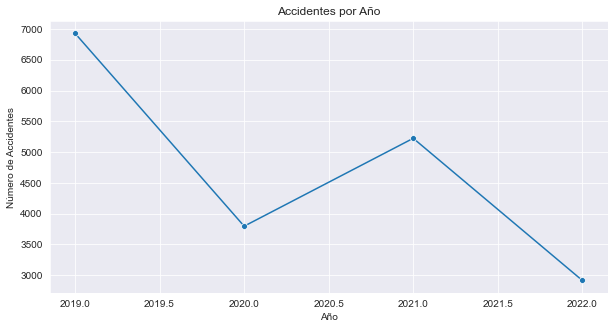

In [51]:
# Calcular accidentes por año
accidentes_por_año = gdf.groupby('Año')['Accidentes'].sum().reset_index()

# Gráfico con la cantidad de accidentes en los años 2019, 2020, 2021 y 2022
plt.figure(figsize=(10, 5))  # Ajustar el tamaño del gráfico si es necesario
sns.lineplot(x='Año', y='Accidentes', data=accidentes_por_año, marker='o')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.title('Accidentes por Año')
plt.show()

In [52]:
gdf.groupby('Año')[['Fallecidos', 'Graves', 'Menos_Grav', 'Leves']].sum()

,Fallecidos,Graves,Menos_Grav,Leves
Año,,,,
2019,60,516,213,2496
2020,53,328,118,1297
2021,50,448,185,1881
2022,31,260,88,831


In [53]:
acc_comunas = gdf.groupby('Comuna')['Accidentes'].sum()
acc_comunas

Comuna
BUIN                    148
CALERA DE TANGO         106
CERRILLOS               962
CERRO NAVIA              41
COLINA                   93
CONCHALI                205
CURACAVI                  6
EL BOSQUE               426
ESTACION CENTRAL        613
HUECHURABA              272
INDEPENDENCIA           337
ISLA DE MAIPO            12
LA CISTERNA             696
LA FLORIDA              551
LA GRANJA               276
LA PINTANA              461
LA REINA                230
LAMPA                    25
LAS CONDES              174
LO BARNECHEA             49
LO ESPEJO                59
LO PRADO                325
MACUL                   201
MAIPU                  1699
MELIPILLA                78
NUNOA                   111
PADRE HURTADO            62
PAINE                    11
PEDRO AGUIRRE CERDA     254
PENAFLOR                 18
PENALOLEN               212
PEÃ‘ALOLEN              214
PEÑAFLOR                 16
PEÑALOLEN               272
PIRQUE                    5
PROVIDENCIA  

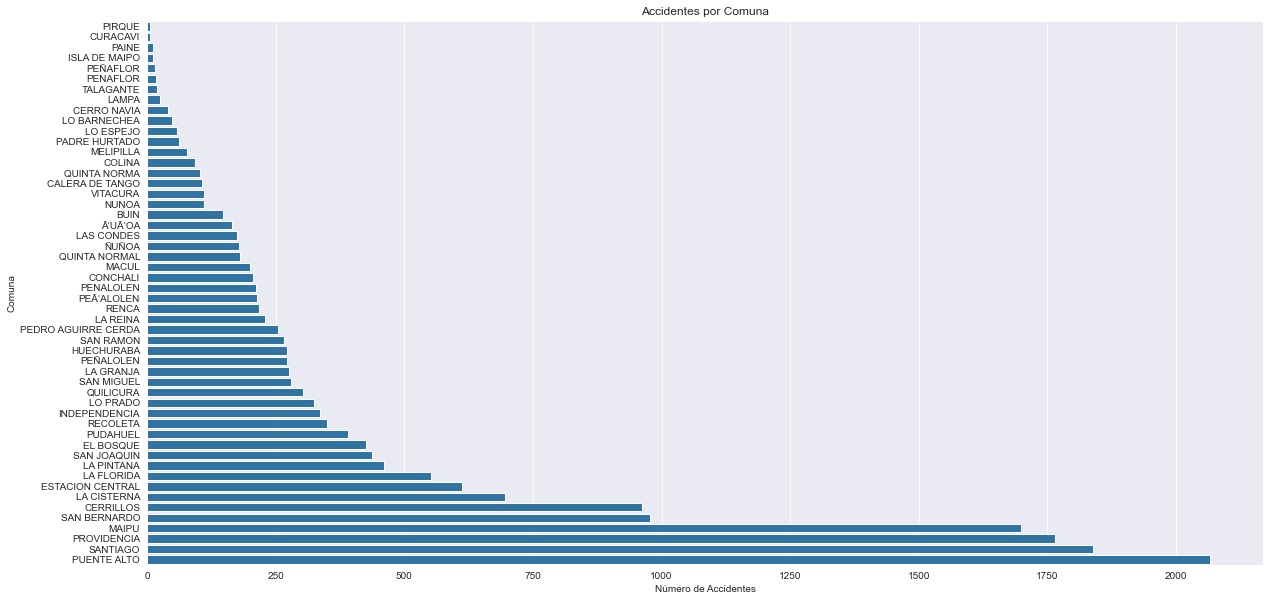

In [54]:
# se crea un gráfico con las comunas y la cantidad de accidentes
plt.figure(figsize=(20, 10))  
sns.barplot(x=acc_comunas.sort_values().values, y=acc_comunas.sort_values().index, orient='h')
plt.xlabel('Número de Accidentes')
plt.ylabel('Comuna')
plt.title('Accidentes por Comuna')
plt.show()

### Analizando la totalidad de los datos, las comunas de Punete Alto, Santiago y Providencia son las que registran la mayor cantidad de accidentes.

In [55]:
gdf.groupby(['Comuna', 'Año'])['Accidentes'].sum().unstack().style.background_gradient()

Año,2019,2020,2021,2022
Comuna,,,,
BUIN,nan,47.000000,89.000000,12.000000
CALERA DE TANGO,nan,29.000000,41.000000,36.000000
CERRILLOS,415.000000,197.000000,211.000000,139.000000
CERRO NAVIA,7.000000,24.000000,10.000000,nan
COLINA,nan,38.000000,50.000000,5.000000
CONCHALI,94.000000,23.000000,62.000000,26.000000
CURACAVI,nan,nan,nan,6.000000
EL BOSQUE,210.000000,87.000000,97.000000,32.000000
ESTACION CENTRAL,234.000000,109.000000,170.000000,100.000000


### Desagregando los accidentes por año, en el 2019 la mayoría se concentraron en la comuna de Puente Alto (812), seguido por Maipú (732). En el 2020, la cantidad de accidentes disminuyó a más de la mitad, siendo la comuna de Santiago la que concentró una mayor cantidad (384), en este año evidentemente la disminución se debe al efecto de la pandemia en la movildiad de las personas. En el año 2021, Santiago vuelve a tener el mayor registro de accidentes (497), seguido por Puente Alto (475). Mientras que en el año 2022, Puente Alto concentró la mayor cifra de accidentes (446), seguido por Providencia (318).

In [62]:
# creación de clusters
years = [2019, 2020, 2021, 2022]
gdfs = [gdf[gdf['Año'] == y] for y in years]
gdf_2019, gdf_2020, gdf_2021, gdf_2022 = gdfs

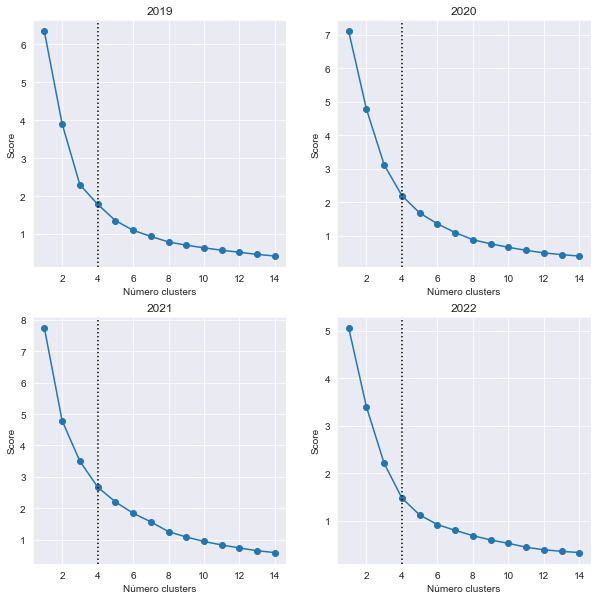

In [63]:
# Se aplica el método del codo para definir el número óptimo de clusters para cada año. Para los cuatro años 
# el número de clusters es 4.

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, gdf in enumerate(gdfs):
    x = gdf.get_coordinates()
    
    range_n_clusters = range(1, 15)
    inertias = []

    for n_clusters in range_n_clusters:
        modelo_kmeans = KMeans(
                            n_clusters   = n_clusters, 
                            n_init       = 20, 
                            random_state = 123
                        )
        modelo_kmeans.fit(x)
        inertias.append(modelo_kmeans.inertia_)

    axs[i].plot(range_n_clusters, inertias, marker='o')
    axs[i].set_title(years[i])
    axs[i].set_xlabel('Número clusters')
    axs[i].set_ylabel('Score')
    axs[i].axvline(4, color='k', ls="dotted");


In [64]:
# Se calcula el modelo K-means, integrando lo obtenido al aplicar el método del codo (4 clusters)
clusters = []
for i, gdf in enumerate(gdfs):
    x = gdf.get_coordinates()
    
    modelo = KMeans(n_clusters=4)
    y_kmeans = modelo.fit_predict(x)
    
    clusters.append(y_kmeans)
    print(len(y_kmeans))

802
475
634
424
